In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from mlxtend.plotting import plot_decision_regions

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\8.twospirals.csv",header=None)

In [3]:
data

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0
...,...,...,...
1995,-3.213608,1.543994,1
1996,5.577210,2.359087,1
1997,-1.393598,-7.876754,1
1998,-7.708972,-4.298002,1


In [4]:
data[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

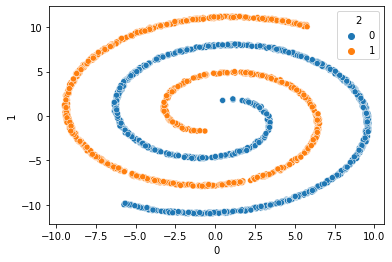

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [7]:
std=StandardScaler()

In [8]:
sc=std.fit_transform(x_train)

In [21]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=2,kernel_initializer="he_uniform"))
model.add(Dense(6,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
144/144 [==============================] - 3s 11ms/step - loss: 3.4452 - accuracy: 0.4208 - val_loss: 2.4988 - val_accuracy: 0.4194
Epoch 2/20
144/144 [==============================] - 1s 5ms/step - loss: 1.5543 - accuracy: 0.4257 - val_loss: 1.2414 - val_accuracy: 0.4167
Epoch 3/20
144/144 [==============================] - 1s 4ms/step - loss: 0.9609 - accuracy: 0.4313 - val_loss: 0.9093 - val_accuracy: 0.4722
Epoch 4/20
144/144 [==============================] - 1s 5ms/step - loss: 0.7856 - accuracy: 0.4951 - val_loss: 0.7866 - val_accuracy: 0.5194
Epoch 5/20
144/144 [==============================] - 1s 5ms/step - loss: 0.7148 - accuracy: 0.5479 - val_loss: 0.7317 - val_accuracy: 0.5389
Epoch 6/20
144/144 [==============================] - 1s 4ms/step - loss: 0.6499 - accuracy: 0.6069 - val_loss: 0.6250 - val_accuracy: 0.6667
Epoch 7/20
144/144 [==============================] - 1s 4ms/step - loss: 0.6236 - accuracy: 0.6514 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch

In [25]:
tl1=save.history["loss"]
cvl1=save.history["val_loss"]

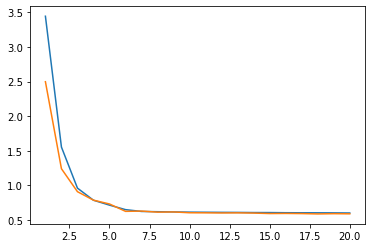

In [26]:
plt.plot(range(1,21),tl1,label="training_loss")
plt.plot(range(1,21),cvl1,label="crossval_loss")

In [27]:
pred=model.predict(x_train)

57/57 [==============================] - 0s 3ms/step


In [28]:
predi1=np.where(pred>0.5,1,0).flatten()

In [29]:
accuracy_score(y_train,predi1)

0.6633333333333333

3888/3888 [==============================] - 10s 3ms/step


<AxesSubplot:>

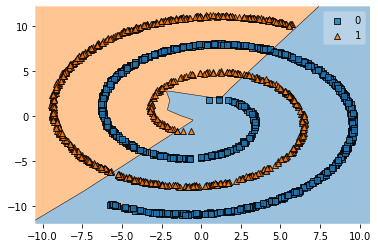

In [31]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

In [26]:
model1=Sequential()
model1.add(Dense(6,activation="relu",input_dim=2))
model1.add(Dense(4,activation="sigmoid"))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation="sigmoid"))


In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
save1=model1.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
144/144 [==============================] - 3s 8ms/step - loss: 0.7698 - accuracy: 0.5049 - val_loss: 0.6619 - val_accuracy: 0.5833
Epoch 2/20
144/144 [==============================] - 1s 8ms/step - loss: 0.7137 - accuracy: 0.5521 - val_loss: 0.6427 - val_accuracy: 0.6278
Epoch 3/20
144/144 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5632 - val_loss: 0.6343 - val_accuracy: 0.6667
Epoch 4/20
144/144 [==============================] - 1s 6ms/step - loss: 0.6753 - accuracy: 0.5799 - val_loss: 0.6283 - val_accuracy: 0.6639
Epoch 5/20
144/144 [==============================] - 1s 5ms/step - loss: 0.6620 - accuracy: 0.6062 - val_loss: 0.6244 - val_accuracy: 0.6722
Epoch 6/20
144/144 [==============================] - 1s 9ms/step - loss: 0.6487 - accuracy: 0.6278 - val_loss: 0.6218 - val_accuracy: 0.6667
Epoch 7/20
144/144 [==============================] - 1s 6ms/step - loss: 0.6506 - accuracy: 0.6257 - val_loss: 0.6194 - val_accuracy: 0.6722
Epoch 

In [30]:
tl=save1.history["loss"]
cvl=save1.history["val_loss"]

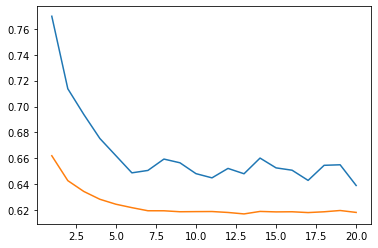

In [31]:
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")

In [34]:
pred1=model1.predict(x_train)

57/57 [==============================] - 0s 3ms/step


In [36]:
predi=np.where(pred1>0.5,1,0).flatten()

In [37]:
accuracy_score(y_train,predi)

0.6644444444444444

3888/3888 [==============================] - 11s 3ms/step


<AxesSubplot:>

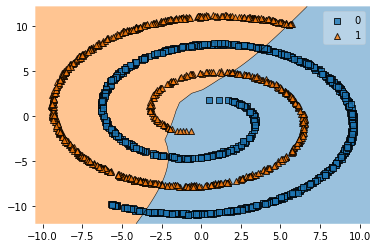

In [38]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model1)